In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
gs=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
train=pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
test.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Train columns with null values:\n', train.isnull().sum())
print('Train columns with null values:\n', test.isnull().sum())


Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Train columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [7]:
print('Train columns with null values:\n', train.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
test['Sex'] = test['Sex'].replace({'male': 1, 'female': 0})
train['Sex'] = train['Sex'].replace({'male': 1, 'female': 0})
train['Embarked'] = train['Embarked'].replace({'Q': 1, 'S': 0,'C': 2})
test['Embarked'] = test['Embarked'].replace({'Q': 1, 'S': 0,'C': 2})

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [10]:
test=test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
train=train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0.0
1,1,1,0,38.000000,1,0,71.2833,2.0
2,1,3,0,26.000000,0,0,7.9250,0.0
3,1,1,0,35.000000,1,0,53.1000,0.0
4,0,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0.0
887,1,1,0,19.000000,0,0,30.0000,0.0
888,0,3,0,29.699118,1,2,23.4500,0.0
889,1,1,1,26.000000,0,0,30.0000,2.0


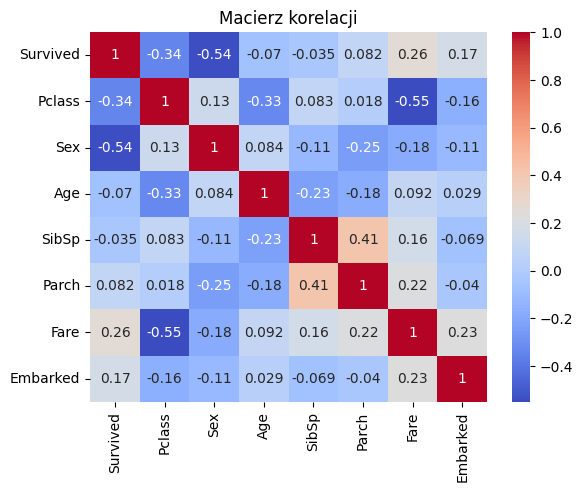

In [11]:
correlation_matrix = train.corr()

# Wyświetlanie macierzy korelacji

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji")
plt.show()

In [12]:
print('Train columns with null values:\n', train.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


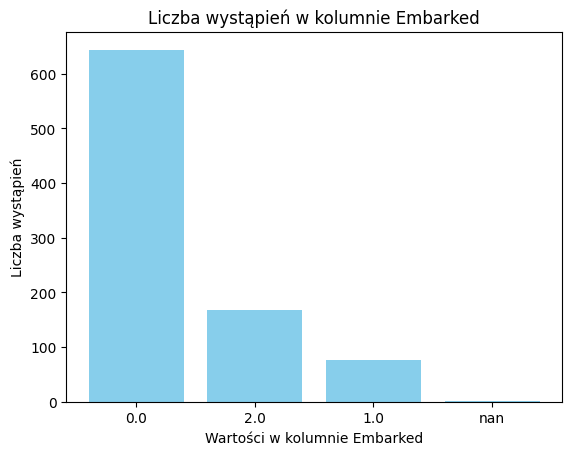

In [13]:
# Liczenie wystąpień wartości w kolumnie Embarked (włączając NaN)
value_counts = train['Embarked'].value_counts(dropna=False)

# Wykres słupkowy
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
plt.title('Liczba wystąpień w kolumnie Embarked')
plt.xlabel('Wartości w kolumnie Embarked')
plt.ylabel('Liczba wystąpień')
plt.show()

In [14]:
train['Embarked'] = train['Embarked'].fillna(0)

In [15]:
print('Train columns with null values:\n', train.isnull().sum())

Train columns with null values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [16]:
X = train[['Pclass', 'Fare', 'Sex','Embarked']]  
y = train['Survived']  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.06%
